In [35]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [2]:
penguins = sns.load_dataset('penguins').dropna()

# Filtragem dos dados

In [10]:
X = np.array(penguins[['bill_depth_mm', 'body_mass_g']]) # Lista de vetores [grossura_bico, peso]
y = np.array(penguins['sex']) # Lista de categorias Macho / Fêmea

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
display(penguins[['bill_depth_mm', 'body_mass_g']])

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0
...,...,...
338,13.7,4925.0
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [5]:
display(penguins['sex'])

,sex
0,Male
1,Female
2,Female
4,Female
5,Male
...,...
338,Female
340,Female
341,Male
342,Female


# Exploração dos dados

In [8]:
total_masculinos = penguins[penguins['sex'] == 'Male'].shape[0]
total_femininos = penguins[penguins['sex'] == 'Female'].shape[0]

print(f'Total de machos: {total_masculinos}')
print(f'Total de fêmeas: {total_femininos}')

Total de machos: 168
Total de fêmeas: 165


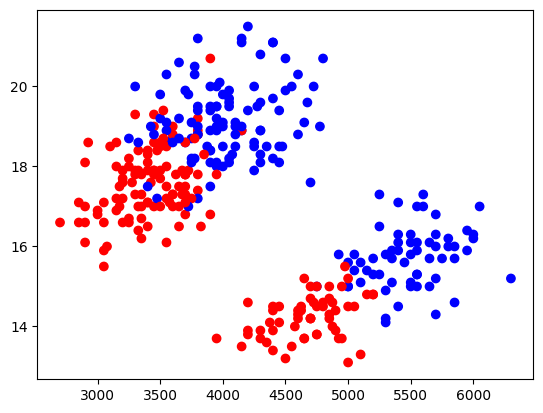

In [33]:
cores = ['red' if s == 'Female' else 'blue' for s in penguins['sex']]
plt.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)

# Treinamento do modelo

## Divisão entre treino e teste

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Treino

In [13]:
classificador = svm.LinearSVC()
classificador.fit(X_train, y_train)

LinearSVC()

## Visualização da fronteira (hiperplano)

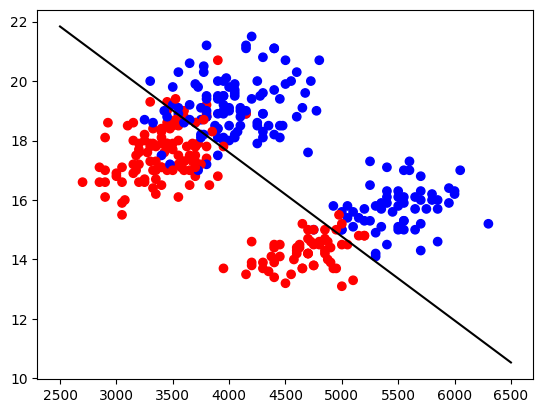

In [34]:
fig, ax = plt.subplots()
ax.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)
w = classificador.coef_
b = classificador.intercept_
a = -(w[0][1]/w[0][0])
b = -b[0]/w[0][0]
ax.plot(np.linspace(2500, 6500, 100), a*np.linspace(2500, 6500, 100)+b, c='black')

# Avaliação do modelo

In [43]:
y_pred = classificador.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [44]:
print("Relatório de Classificação:")
print()
print(classification_report(y_test, y_pred, target_names=['Fêmea', 'Macho']))


Relatório de Classificação:

              precision    recall  f1-score   support

       Fêmea       0.86      0.88      0.87        48
       Macho       0.88      0.87      0.87        52

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



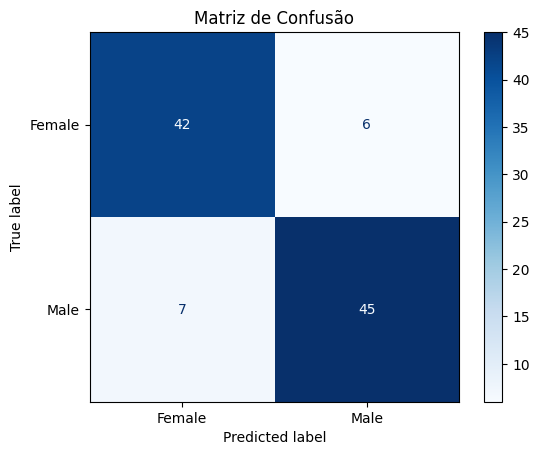

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=classificador.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classificador.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()